# 차원 축소(Dimension Reduction)
머신 러닝에서 하나의 feature가 늘어날 때마다 하나의 차원이 증가합니다.\
차원 축소는 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이타 세트를 생성하는 것이다.

## 차원축소

**효능**
- 시각적으로 데이터를 압축하여 표현할 수 있다. (**시각화를 통해 쉽게 데이터의 패턴을 인지**)
- 학습에 필요한 처리 능력도 줄일 수 있다. (**쓸모 없는 feature 제거로 노이즈를 제거, 메모리 절약**)
- 과적합으로 영향력이 작아져서 예측 성능을 더 끌어 올릴 수 있다. (**성능 향상**)

**기법**
- PCA
- LDA
- SVD
- NMF

### 피처 선택(Feature selection)
특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택 하는 것 (단순히 일부 변수만 빼내는 기법)
### 피처추출 (Feature extraction)
기존 피처를 저 차원의 중요피처로 압축해서 추출 하는 것 (기존 변수(피처)를 조합해 새로운 변수를 만드는 기법)

> 기존의 피처가 압축된 것으므로 기존의 피처와는 **완전히 다른 값**이다.

# PCA (Principal Component Analysis)
데이터의 분산(variance)을 최대한 보존하면서 서로 직교하는 새 기저(축)를 찾아, 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간으로 변환하는 기법입니다. 

![그림](https://t1.daumcdn.net/cfile/tistory/99126C375F4112F736)

> 서로 직교하는 새 기저(축)을 찾는 다는 것은 이를 통해 데이터 변동성이 가장 큰 방향으로 축을 생성하는 것이다.
- 키 몸무게가 있는 축이 있다.
- 키의 평균값과 몸무게의 평균값으로 좌표를 확인할 수 있다.
- 좌표를 중심으로 데이터들의 거리가 최대한 보존한 채(분산이 가장 넓은 곳) 선을 그어 축을 생성한다.

![PC](https://github.com/ExcelsiorCJH/Hands-On-ML/raw/eea2a029ec626854a972c24230de9053e1ece4af/Chap08-Dimensionality_Reduction/images/pca02.gif)
 
 위 그림을 보게되면 PC를 찾기 위한 새로운 축을 찾아가는 과정을 이해할 수 있다.
 
- 주성분 분석이 필요한 이유
https://chancoding.tistory.com/53

- 주성분 분석의 이해
https://angeloyeo.github.io/2019/07/27/PCA.html

- 참고 블로그
https://ariz1623.tistory.com/216

보통 PCA는 다음과 같은 스텝으로 수행된다.
1. 입력 데이터세트의 공분산 행렬을 생성합니다.
2. 공분산 행렬의 고유벡터와 고유값을 계산합니다.
3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수 만큼) 고유벡터를 추출합니다.
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환합니다.

> 즉, 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형변환하는 방식을 PCA라고 한다.


## PCA 실습

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다스 데이터 프레임으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


x축을 `sepal length`, y축을 `sepal width`로 하여 데이터 분포를 나타낸다.

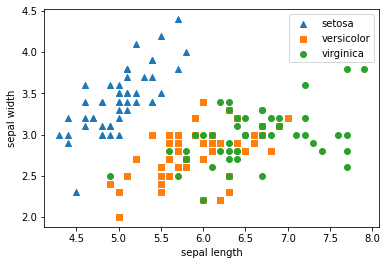

In [3]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

for i , marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])


    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

`setosa` 품종은 일정하게 분포되어 있습니다.\
하지만 Versicolor와 virginica의 경우는 sepal width와 sepal lenth 조건만으로는 분류가 어려운 복잡한 조건입니다.

이제부터 **PCA**를 활용하여 4개의 속성을 2개로 압축하고 데이터 품종 분포를 시각화 해봅시다.

### 스케일링
우선 PCA를 적용하기전에 개별 속성을 함께 스케일링 해야합니다.\
PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받는다.

In [5]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 
# 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

### PCA
이제 PCA를 적용하여 2차원 PCA 데이터로 변환합니다.

> - `n_components` : PCA로 변환할 차원의 수를 의미하므로 여기서는 2로 설정한다.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


2차원으로 변환 것을 확인할 수 있었다. 이제 Dataframe으로 데이터 값을 살펴보자

In [7]:
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target # irisDF_pca 타겟 추가
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


시각화 해보자

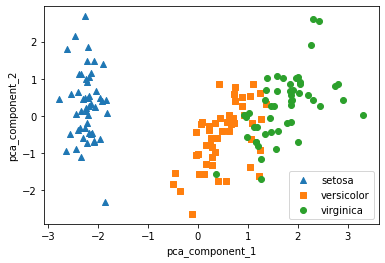

In [8]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

명확하게 분리 된 것을 확인 할 수 있었다. \
이는 PCA의 첫 번째 새로운 축인 pca_component_1이 원본 데이터의 변동성을 매우 잘 반영했기 때문이다.\

>`explained_variance_ratio_` : 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율을 제공하고 있다.




In [9]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


첫 번째 PCA 변환 요소인 pca_component_1 이 전체 변동성의 약 73%를 차지하고 두 번째 변환 요소는 22.8%를 차지 한다.\
즉, PCA를 2개의 요소로만 해도, 변동성은 95%이다.

> 생각보다 원본 데이터의 정확도보다 낮을 수 있다. 이유는 변환 차원의 개수에 따라 성능이 떨어질 수 밖에 없는 특징이다.

# LDA (Linear Discriminant Analysis)
**선형판별분석**(LDA)는 PCA와 마찬가지로 축소 방법 중 하나이다.\
이는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소시키는 기법이지만,\
LDA는 **지도 학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소**한다.(지도학습에 사용)

## 원리
PCA는 데이터의 변동성이 최대가 되는 축을 찾아 주성분으로 정했지만,\
LDA는 **데이터의 Target값 클래스끼리 최대한 분리할 수 있는 축**을 찾습니다. 
![원리](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FCsr5o%2FbtqARiYH8pQ%2FaKF90QwuCICZtL4GmOWcr1%2Fimg.png)
LDA는 오른쪽 그림과 같이 분류를 해주는 기법이다.

1. 투영 후 두 클래스 간 분산은 최대한 크게 가져가고, 
2. 클래스 내부의 분산은 최대한 작게 가져가는 방식입니다. 


클래스 간 분산이 최대가 된다는 것은 각 클래스의 중심(평균)이 서로 멀어지도록 분류한다는 것입니다. \
이해가 안간 다면 밑에 그림을 보면 된다.

![LDA](https://michael-fuchs-python.netlify.app/post/2020-08-07-linear-discriminant-analysis-lda_files/p58s1.png)

밑줄 부분의 거리를 크게하고, 클래스 하나의 두께를 낮추는 것이다.


 LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 **클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식**으로 차원을 축소합니다.

> SVM을 적용하기 전에 LDA를 통해  클래스를 멀리 떨어지게 하는게 좋을 듯하다.


1. 클래스 내부와 클래스 간 분산행렬을 구한다. 이 두개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터를 기반으로 구한다.

2. **클래수 내부 분산 행렬을 $S_w$**, **클래스 간 분산 행렬을 $S_B$** 라고 하면 다음 식으로 두 행렬을 고유벡터로 분해할 수 있다.

$$S^T_WS_B \begin{bmatrix}e_1 ... e_n\end{bmatrix} \begin{bmatrix}
\lambda_1 & \cdots & 0 \\
\cdots & \cdots & \cdots \\
0 & \cdots & \lambda_n
\end{bmatrix}\begin{bmatrix}
e_1^T \\
\cdots \\
e_n^T
\end{bmatrix}$$ 

3.  고유값이 가장 큰 순으로 K개(LDA변환 차수 만큼)추출한다.
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용하여 새롭게 입력 데이터를 변환한다.

``` py
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
```

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [26]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


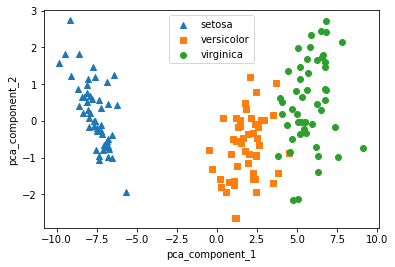

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

# SVD(Singular Value Decomposition)
SVD 역시 PCA와 유사하게 행렬 분해 기법을 이용한다.\
하지만 차이점은 PCA는 정방행렬만을 고유벡터로 분해할 수 있지만, **SVD는 정방행렬 뿐만 아니라 행과 열의 크기가 다른 행렬도 적용이 가능하다.**

$$A = U\sum V^T$$
![SDA 특이값 분해](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fed4EoS%2Fbtq3SvwcFrh%2FKgnIEHTDX48kSyGdwYt87k%2Fimg.webp)
SVD는 **특이값 분해**로 불리며, 행렬 $U$와 $V$에 속한 특이 벡터이며, **모든 특이 벡터는 서로 직교 하는 성질**을 가진다.\
∑는 대각행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0이다. **∑가 위치한 0이 아닌 값이 바로 행렬 A의 특이값이다.**

하지만 일반적으로 ∑ 의 비대각인 부분과 대각 원소중에 특이값이 0 인 부분도 모두 제거 하고 제거된 ∑에 대응되는 U와 V원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용한다.

이렇게 컴팩트한 형태로 SVD를 적용하면 A의 차원이 m x n 일때, U의 차원을 m x p , ∑의 차원을 p x p , V^T 의 차원을 p x n 으로 분해 한다.

> **Trucated SVD**는 ∑의 대각 원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것이다

## SVD 실습
일반적으로 SVD는 보통 넘파이나 사이파이 라이브러리를 이용해 구현한다.
```py
from numpy.linalg import svd
```

In [10]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


이렇게 생성된 a 행렬에 `svd()`를 적용해 U, Sigma, Vt를 도출해 보자.

In [11]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


분해 된 U,Sigma, V_t를 이용해 다시 원본 행렬로 정확히 복원되는지 확인해 보자.

In [16]:
Sigma_mat = np.diag(Sigma) #Sigma 4X4로 맞추기
a_ = np.dot(np.dot(U, Sigma_mat), Vt) # U*V*D
print(Sigma_mat, "\n")


print(np.round(a_, 3))


[[3.4229581  0.         0.         0.        ]
 [0.         2.02287339 0.         0.        ]
 [0.         0.         0.46263157 0.        ]
 [0.         0.         0.         0.07935069]] 

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


U, Sigma, V_t를 이용해 a_는 원본 행렬 **a와 동일하게 복원됨**을 알 수 있다.

이번에는 데이터 셋이 로우(행) 간 의존성이 있을 경우 **어떻게 Sigma값이 변하고 , 이에 따른 차원 축소가 진행될 수 있는지** 알아보자.

In [17]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


재조합 해본 결과, 이제 a행렬은 이전과 다르게 로우 간 관계가 높아졌다. 이데이터를 SVD로 다시 분해하자.

In [19]:
# 다시 SVD를 수행하여 Sigma 값 확인 
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


전과 차원은 같지만 Sigma 값 중 2개가 0으로 변했다.

즉 , 선형 독립인 로우 벡터의 개수가 2개라는 의미이다.

이렇게 분해된 U, Sigma, V_t를 이용해 다시 원본 행렬로 복원해보자.

In [20]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


## TruncatedSVD 클래스를 이용한 변환

이번엔 사이킷런의 `TruncatedSVD` 클래스를 이용하여 차원을 축소해 변환한다.
```py
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=2)
```

Text(0, 0.5, 'TruncatedSVD Component 2')

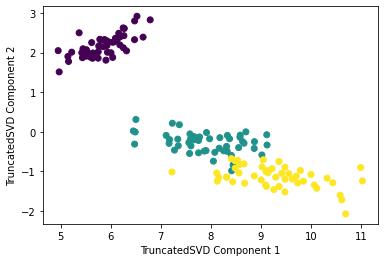

In [21]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

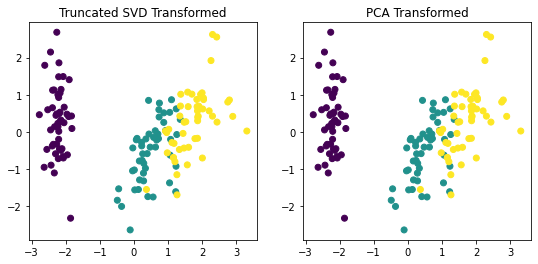

In [22]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [23]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3363024477992174e-15
-2.949029909160572e-17


위 결과를 봤듯이, 사이킷런의 TruncatedSVD와 PCA 클래스는  두 개 클래스 모두 SVD를 이용해 행렬을 분해하기 때문에 스케일링 후 변환하면 두개다 동일함을 알 수 있다.

컴포넌트 비율값을 실제로 서로 비교해 보면 거의 같음을 알 수 있다.

# NMF (Non - Negative Matrix Factorization)
NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형이다.\
NMF는 **음수 미포함 행렬 분해**라고 하며, 음수를 포함하지 않는 행렬 $X$를 음수를 포함하지 않는 행렬 $W$,$H$곱으로 분해하는 알고리즘이다.

$$X = WH$$

![nmf](https://upload.wikimedia.org/wikipedia/commons/f/f9/NMF.png)

- $X$ : 행렬 X는 데이터 셋이다. 말그대로 $m \times n$ 이면 $샘플 \times 차원$ 인것이다.
- 한편, 행렬 $W$,$H$의 차원은 사용자의 필요에 맞게 결정해줄 수 있다. (물론 행과 열은 $m \times n$ 이다.)
- 행렬 W의 각 열은 데이터의 특성이 되고, 행은 '특성에 대한 적합도', 즉 특성에 대한 가중치를 나타낸다. 
- 행렬 H의 각 행은 특성이 되고, 열은 '특성에 대한 중요도'를 나타낸다.




NMF 알고리즘은 PCA와 유사하다. 차원축소에도 사용할 수 있고 어떤 성분의 가중치합을 각 데이터 포인트를 통해 나타낼 수 있다.\
차이점은 

- PCA : 데이터의 분산이 가장 크고 수직인 성분을 찾는다.
- NMF : 음수가 아닌 성분과 계수 값을 찾는다.

PCA는 최대 분산의 방향을 주성분이라 하여 성분 간의 우열이 있는 반면 NMF는 **특성이 양수이기만 하면 성분의 우열이 없이 특징을 나눌 수 있는 것이다.**

하나의 성분만을 사용한다면 NMF는 데이터를 가장 잘 표현할 수 있는 평균으로 향하는 성분을 만든다. 

**PCA와는 반대로 성분의 개수를 줄이면 특정 방향이 제거될  뿐만 아니라 전체 성분이 완전히 바뀌어버린다.**


```py
from sklearn.decomposition import NMF
nmf = NMF(n_components=2)

```

/Users/dongwoo/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Text(0, 0.5, 'NMF Component 2')

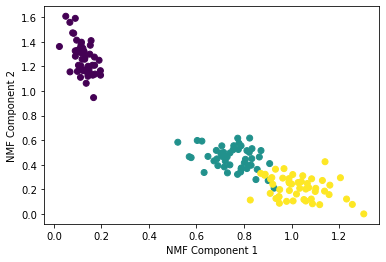

In [24]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

NMF도 SVD와 유사하게 이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링 기법, 문서 유다소 및 클러스터링에 잘 사용된다. 또한 영화 추천과 같은 추천 영역에 활발하게 적용 된다.

사용자의 상품 평가 데이터 셋인 사용자-평가 순위 데이터 셋을 행렬 분해 기법을 통해 분해하면서 사용자가 평가하지 않은 상품에 대한 잠재적인 요소를 추출해 이를 통해 평가 순위를 예측하고, 높은 순위로 예측된 상품을 추천해주는 방식이다.